In [41]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Dense , Dropout , LSTM 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [42]:
#reading the dataset
df = pd.read_csv("international-airline-passengers.csv")
df

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


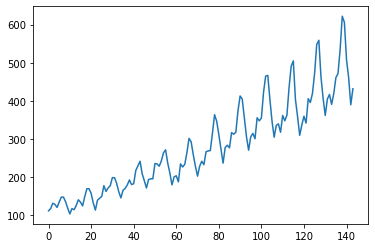

In [43]:
#plotting the dataset
plt.plot(df.passengers)

In [44]:
#convert data to np array
data = np.asanyarray(df[['passengers']])
data.shape

(144, 1)

In [45]:
#normalizing the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data) #Place the data in the range (0,1)

### در اینجا دیتا باید پیوسته باشد و نباید به صورت رندوم تست و تِرین را جدا کنیم زیرا ترتیب در دیتا مهم است

In [46]:
#train and test data
train_size = int(0.60*len(data)) #Placing 60% of the data for training
test_size = len(data) - train_size #Placing 40% of the data for testing
train,test = data[0:train_size,:] , data[train_size:len(data),:]
print(f"train's shape->{train.shape}\ntest's shape->{test.shape}")

train's shape->(86, 1)
test's shape->(58, 1)


#### اگر تایم استِپ ما 5 باشد باید دیتا را به نحوی تغییر دهیم که هر 5 سطر پشت هم یک دیتا در نظر گرفته شوند
#### یعنی از 0 تا 4 یک ویژگی و از 1 تا 5 یک ویژگی و ... به همین ترتیب الی آخر

In [47]:
def create_data(data,time_step=1):
    X , Y = [],[]
    for i in range(len(data)-time_step-1):
        a=data[i:(i+time_step),0]
        X.append(a)
        Y.append(data[i+time_step,0])
    return np.array(X) , np.array(Y)

## توضیح تابع بالا
- یک حلقه ساختیم که، چون به اندازه ی تایم استپ در هر ویژگی عضو 
داریم پس حلقه خانه های آخر را نمی بیند پس حلقه در بازه ی خانه ی 
آخر منهای تایم استپ خواهد بود
- ویژگی هایمان را از دیتا جدا میکنیم، ویژگی اول، از 0 تا 4 و ویژگی دوم از 1 تا 5 است
- لیبل ما در این دیتا، حاصل یکی بعد از ویژگیهایمان میباشد، یعنی برای ویژگی های اول از 0 تا 4 است، لیبل ما 5 امین خانه خواهد بود

In [48]:
Xtrain , Ytrain = create_data(train,time_step=10)
Xtest , Ytest = create_data(test,time_step=10)

In [49]:
print(f"Xtrain's shape->{Xtrain.shape}\ntrain's shape->{train.shape}\nYtrain's shape{Ytrain.shape}")
print("==============================")
print(f"Xtest's shape->{Xtest.shape}\ntest's shape->{test.shape}\nYtest's shape{Ytest.shape}")


Xtrain's shape->(75, 10)
train's shape->(86, 1)
Ytrain's shape(75,)
Xtest's shape->(47, 10)
test's shape->(58, 1)
Ytest's shape(47,)


In [50]:
print(Xtrain[0],Ytrain[0],"\n",train[:11])

[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753] 0.0 
 [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]]


### همانطور که میبینید لیبل اول برابر با 11 امین خانه در تِرین است

In [51]:
#Reshape input to be(samples,time steps,features)
#Reshape the datasets to 3D array
Xtrain=Xtrain.reshape((Xtrain.shape[0],Xtrain.shape[1],1))
Xtest=Xtest.reshape((Xtest.shape[0],Xtest.shape[1],1))
print(f"Xtrain's shape->{Xtrain.shape}\nXtest's shape->{Xtest.shape}")  

Xtrain's shape->(75, 10, 1)
Xtest's shape->(47, 10, 1)


In [52]:
#Create the model
model = tf.keras.Sequential()
model.add(LSTM(5,input_shape=(10,1))) #5 neurons
model.add(Dense(1)) #A neuron to calculate prediction
#Compile the model
model.compile(
    loss="mean_squared_error",
    optimizer="adam")

In [53]:
#Fit the LSTM network
model_fit=model.fit(Xtrain,Ytrain,epochs=30,batch_size=1)

Epoch 1/30
75/75 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 2/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 3/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 4/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 5/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 6/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 7/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 8/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 9/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 11/30
75/75 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 12/30
75/75 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 13/30
75/75 [==============================

In [54]:
hist = model_fit.history
hist.keys()

dict_keys(['loss'])

(0.0, 1.0)

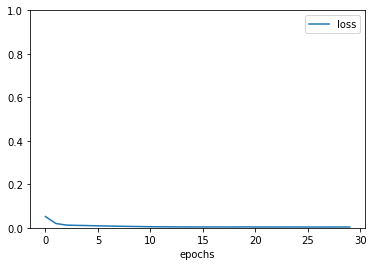

In [55]:
#validation curve
hist = model_fit.history
plt.plot(hist["loss"],label="loss")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.ylim((0,1))


In [56]:
#Predict test and train datasets
trainPred = model.predict(Xtrain)
testPred = model.predict(Xtest)

In [57]:
print(trainPred[:5])
print("===============")
print(Ytrain[:5])

[[0.08545221]
 [0.07960825]
 [0.07831584]
 [0.0747069 ]
 [0.07484829]]
[0.         0.02702703 0.02123552 0.04247104 0.07142857]


In [59]:
#Inverse transform of normalizing the data
trainPred = scaler.inverse_transform(trainPred)
testPred = scaler.inverse_transform(testPred)

In [61]:
Ytrain = scaler.inverse_transform([Ytrain])
Ytest = scaler.inverse_transform([Ytest])

In [65]:
#Calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
trainScore = sqrt(mean_squared_error(trainPred[:,0],Ytrain[0]))
testScore = sqrt(mean_squared_error(testPred[:,0],Ytest[0]))

In [66]:
print("train score->{}".format(trainScore))
print("============")
print("test score->{}".format(testScore))

train score->30.496935504480472
test score->79.39036140384576


In [68]:
data = scaler.inverse_transform(data)


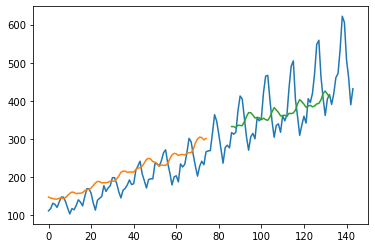

In [86]:
#plot predict data
x_plot = np.arange(len(Xtrain)+11,len(data)-11)
plt.plot(data,label="data")
plt.plot(trainPred,label="train")
plt.plot(x_plot,testPred,label="test")

In [83]:
testPred.shape

(47, 1)

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173